In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
def get_totals_dictionary(ax):
    labels = ax.get_xticklabels() # get x labels

    heights = [(x.get_x(), x.get_height()) for x in ax.patches]
    #print('heights s1', heights[::len(labels)])
    #print('heights s2', heights[1::len(labels)])
    response = dict()
    for x, y in zip(list(heights)[::len(labels)], list(heights)[1::len(labels)]):
        #print(x, '-', y)
        response[x[0]] = x[1] + y[1]
        response[y[0]] = response[x[0]]

    #print(response) 
    return response

def barplot(x_, y_, hue_, data_, figsize_,title_):
    plt.subplots(figsize=figsize_)
    
    if hue_ is None:
        ax = sns.barplot(x=x_, y=y_, data = data_)
    else:
        ax = sns.barplot(x=x_, y=y_, hue=hue_, data = data_)        
    
    ax.set_title(title_)
    labels = ax.get_xticklabels() # get x labels
    patch_totals = get_totals_dictionary(ax)
    patch_i = 0
    plt.legend(loc='upper center')
    for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()),
                    (p.get_x() + p.get_width()/4, p.get_height()+2))
        ax.set_xticklabels(labels, rotation=0) # set new labels
        patch_i +=1


In [36]:
raw = [
    {'dataset':'SEARCH BOGOTÁ','tweets':'Accidents','count':5848, 'percentage':0.15},
    {'dataset':'SEARCH BOGOTÁ','tweets':'No Accidents','count':4021465, 'percentage':99.85},
    {'dataset':'SEARCH TOKEN','tweets':'Accidents','count':60975, 'percentage':22.49},
    {'dataset':'SEARCH TOKEN','tweets':'No Accidents','count':210178, 'percentage':77.51},
    {'dataset':'SEARCH TIMELINE USER','tweets':'Accidents','count':50111, 'percentage':49.8},
    {'dataset':'SEARCH TIMELINE USER','tweets':'No Accidents','count':50507, 'percentage':50.2},
    {'dataset':'STREAM FOLLOW USER','tweets':'Accidents','count':87274, 'percentage':15.19},
    {'dataset':'STREAM FOLLOW USER','tweets':'No Accidents','count':487542, 'percentage':84.81}    
]
df = pd.DataFrame(raw)
df

,dataset,tweets,count,percentage
0,SEARCH BOGOTÁ,Accidents,5848,0.15
1,SEARCH BOGOTÁ,No Accidents,4021465,99.85
2,SEARCH TOKEN,Accidents,60975,22.49
3,SEARCH TOKEN,No Accidents,210178,77.51
4,SEARCH TIMELINE USER,Accidents,50111,49.80
5,SEARCH TIMELINE USER,No Accidents,50507,50.20
6,STREAM FOLLOW USER,Accidents,87274,15.19
7,STREAM FOLLOW USER,No Accidents,487542,84.81


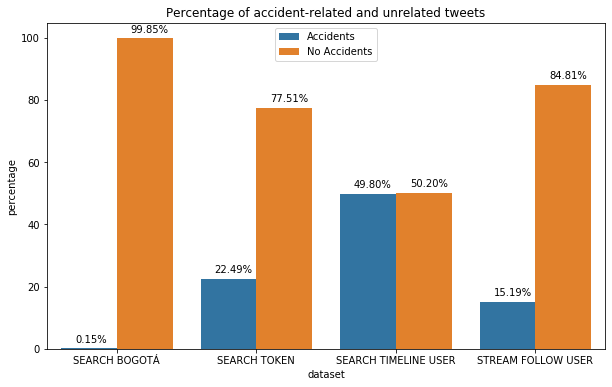

In [60]:
barplot(x_="dataset", y_='percentage',hue_='tweets', data_=df, figsize_=(10,6),title_='Percentage of accident-related and unrelated tweets')

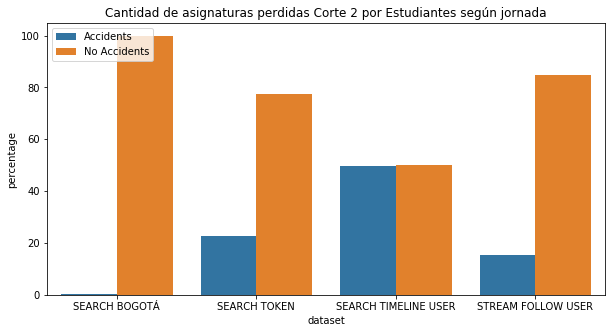

In [52]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="dataset", y='percentage', hue="tweets", data=df)
ax.set_title('Cantidad de asignaturas perdidas Corte 2 por Estudiantes según jornada')
plt.legend(loc='upper left')
plt.show()